In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as ss


In [2]:
#Load dataset and inspect 
df = pd.read_csv('instagram.csv')
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [3]:
# Check for missing values
df.isna().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [4]:
#Check for duplicates
df.duplicated().sum()

0

In [5]:
df.describe()

,User ID,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,63.323462,42.848408
std,750.699674,26.579760,28.758349
min,0.000000,5.000000,0.940709
25%,649.750000,38.000000,19.452098
50%,1299.500000,72.000000,28.013082
75%,1949.250000,86.000000,72.116945
max,2599.000000,118.000000,107.349821


In [6]:
#Rename the needed columns 
df.rename(columns={'Instagram visit score': 'visit_score', 'Spending_rank(0 to 100)':'spending_rank'}, inplace=True)

In [7]:
#Check for the update
df.head()

,User ID,visit_score,spending_rank
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [8]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User ID        2600 non-null   int64  
 1   visit_score    2600 non-null   int64  
 2   spending_rank  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


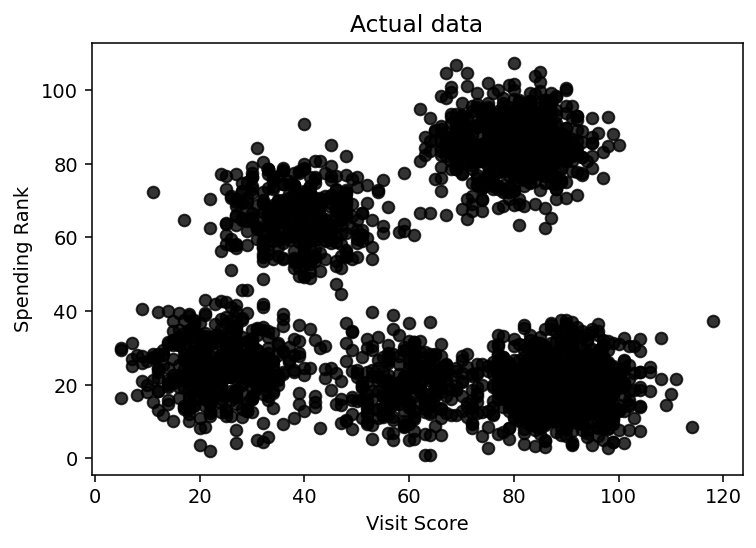

In [9]:
# visualize the plot to see what the data looks like
plt.figure(figsize=(6, 4), dpi=140)
plt.scatter(df['visit_score'], df['spending_rank'], color='k', alpha=0.8)
plt.xlabel('Visit Score')
plt.ylabel('Spending Rank')
plt.title('Actual data')
plt.savefig('Actual result')
plt.show()

# Standardize the data by using Standard Scaler



In [12]:
#Standardize data
scaled_df = StandardScaler().fit_transform(df[['visit_score', 'spending_rank']])
scaled_df

array([[-0.01217181, -0.65376894],
       [-0.08743151, -0.61298749],
       [ 1.53065202, -0.84583579],
       ...,
       [ 1.38013262,  1.46598081],
       [ 0.89094458, -0.77618835],
       [-1.10343744,  1.16650181]])

In [37]:
#Implement DBSCAN and pass the hyperparameters
# -1 means the point is a noise and so cannot or does not belong to a cluster
#DBSCAN chooses the nunber of cluster based on the eps and min_samples

dbscan = DBSCAN(eps=0.22, min_samples=18)


In [38]:
#Fit the DBSSCAN model and create a coloumn for it
df['Cluster'] = dbscan.fit(scaled_df)
df['Cluster'] = dbscan.labels_
df['Cluster'].values

array([0, 0, 0, ..., 1, 0, 3], dtype=int64)

In [39]:
#Check the dataframe
df.head()

,User ID,visit_score,spending_rank,Cluster
0,0,63,24.050708,0
1,1,61,25.223290,0
2,2,104,18.528245,0
3,3,82,86.890232,1
4,4,14,31.492397,2


In [28]:
#Count the values of each number of cluster or label  
df['Cluster'].value_counts()

 0    1098
 1     595
 2     492
 3     392
-1      23
Name: Cluster, dtype: int64

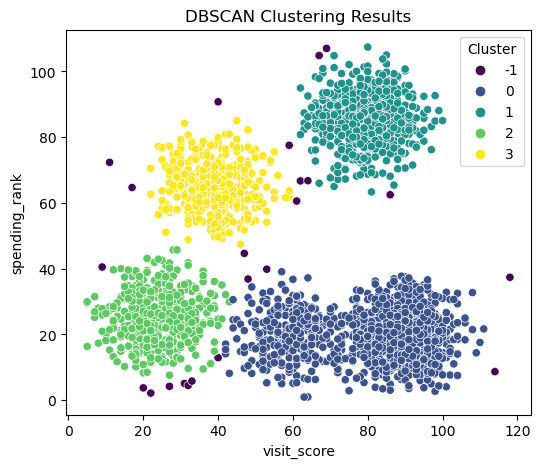

In [30]:
# Visualize the predicted clusters and noise points

plt.figure(figsize=(6, 5))
sns.scatterplot(x='visit_score', y='spending_rank', hue=df['Cluster'], data=df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results')
plt.show()

# SO, HOW DO WE OPTIMIZE THIS ALGORITHM?

In [31]:
#Finding the best hyperparameters with silhoutte score and optimizing

ss(scaled_df, df['Cluster'])

0.6363422710949977

In [32]:
warnings.filterwarnings('ignore')

epsilon = np.linspace(0.1, 1, num=30)
min_samples = np.arange(2, 20, step=2)

#Create a dataframe to store the the silhouette score for each iteration
silhouette_scores= pd.DataFrame()

for eps_num in epsilon:
    for  min_sample_num in min_samples:
        db = DBSCAN(eps=eps_num, min_samples=min_sample_num)
        
        if(len(np.unique(db.fit_predict(scaled_df))) > 1):
            score = ss(scaled_df, db.fit_predict(scaled_df))
        else:
            continue
        parameters = 'eps:' + str (eps_num) + 'min_sample:' + str(min_sample_num)
        silhouette_scores = silhouette_scores.append(pd.DataFrame(data=[[score, parameters]], columns=['score','parameters']))
    

In [33]:
silhouette_scores.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.637603,eps:0.22413793103448276min_sample:18


# RESOURCES

* https://medium.com/@sachinsoni600517/clustering-like-a-pro-a-beginners-guide-to-dbscan-6c8274c362c4
* https://www.reneshbedre.com/blog/dbscan-python.html#google_vignette
* https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
* https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
* https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
